<a href="https://colab.research.google.com/github/CNU-Jiho-Jeong/Data-analysis-lecture/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 역전파 (Backpropagation)

- **다층 퍼셉트론 학습**에 사용되는 통계적 기법을 의미
- 파이썬 라이브러리에 올려두어서 편히 쓸 수 있다!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

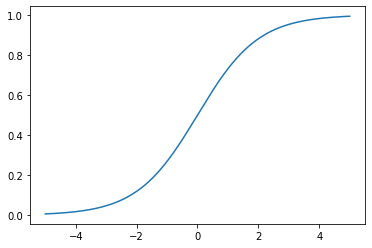

In [3]:
x = np.linspace(-5, 5, 1001)
y = sigmoid(x)

plt.plot(x,y)

In [4]:
# backpropagation

np.random.seed(10)

# Give X and T
X = np.array([[0,0], [0,1], [1,0], [1,1]])
T = np.array([0, 1, 1, 0])

# initial weights
# input ~ hidden layer
w1 = np.random.randn(2,2) # w1_11, w1_12, w1_21, w1_22 / np.random.randn(): 표준정규분포로부터 샘플링된 난수를 반환 
b1 = np.random.randn(1,2) # w1_01, w1_02

# hidden ~ output layer
w2 = np.random.randn(1,2) # w2_1, w2_2
b2 = np.random.randn(1) # w2_0

# Learning setting
lr = 0.05 # learning rate
mse = [] # Mean Squared Error: 평균 제곱 오차
epochs = 20000

for epoch in range(epochs):
  E = np.array([])
  Y = np.array([])

  for i in range(len(X)):
    a = np.array([])

    # feedforward
    # input -> hidden
    for j in range(len(w1)):
      a = np.append(a, np.dot(X[i], w1[j]) + b1[0][j])

    Z = sigmoid(a)

    # hidden -> output
    b = np.dot(Z, w2.T) + b2
    y = sigmoid(b)

    Y = np.append(Y, y)


    # backpropagation
    # error
    E = np.append(E, y - T[i])

    # da/dw
    D1 = X[i]

    # db/da = db/dz * dz/da
    D2 = w2 * Z * (1 - Z)

    # dE/db = dE/dy * dy/db
    D3 = E[i] * y * (1 - y)


    # weight update
    w2 = w2 - lr * D3 * Z
    b2 = b2 - lr * D3 * 1

    w1 = w1 - lr * D3 * D2 * D1
    b1 = b1 - lr * D3 * D2 * 1

  if epoch % 1000 == 0:
    print('epoch : {:5d} mes : {:1.4f}'.format(epoch, np.mean(E**2)))
  mse.append(np.mean(E**2))


epoch :     0 mes : 0.2536
epoch :  1000 mes : 0.2488
epoch :  2000 mes : 0.2463
epoch :  3000 mes : 0.2423
epoch :  4000 mes : 0.2375
epoch :  5000 mes : 0.2344
epoch :  6000 mes : 0.2340
epoch :  7000 mes : 0.2350
epoch :  8000 mes : 0.2363
epoch :  9000 mes : 0.2369
epoch : 10000 mes : 0.2364
epoch : 11000 mes : 0.2335
epoch : 12000 mes : 0.2263
epoch : 13000 mes : 0.2127
epoch : 14000 mes : 0.1908
epoch : 15000 mes : 0.1549
epoch : 16000 mes : 0.1132
epoch : 17000 mes : 0.0817
epoch : 18000 mes : 0.0614
epoch : 19000 mes : 0.0482


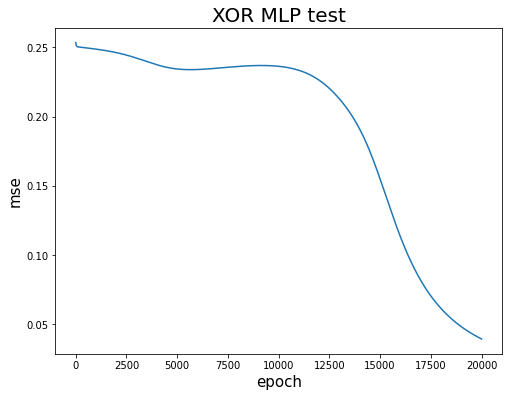

In [5]:
# loss 시각화

plt.figure(figsize = (8,6))
plt.plot(mse) # Mean Squared Error (평균제곱오차)
plt.xlabel("epoch", fontsize = 15)
plt.ylabel("mse", fontsize = 15)
plt.title("XOR MLP test", fontsize = 20)
plt.show()

# 반복수가 증가할 수록 오차가 줄어드는 것을 볼 수 있다. 

In [6]:
# 학습된 weight 살펴보기
print("w2 : ", w2, "b2 : ", b2)
print("w1 : ", w1, "b1 : ", b1)


w2 :  [[ 7.17029531 -7.72137662]] b2 :  [-3.62203543]
w1 :  [[4.5514686  2.98954802]
 [1.6744818  2.2658852 ]] b1 :  [[-0.79002459 -3.45037573]]


In [7]:
# XOR gate 실행하기

def perceptron(x1, x2, w1, w2, b, activation_function):
  return activation_function(x1*w1 + x2*w2 + b)

w1_11, w1_21, w1_12, w1_22 = w1.reshape(4)
b1_1, b1_2 = b1.reshape(2)

w2_1, w2_2 = w2.reshape(2)
b2 = b2

for x1 in range(2):
  for x2 in range(2):
    
    z1 = perceptron(x1, x2, w1_11, w1_21, b1_1, sigmoid) # 활성화 함수로 시그모이드 함수 사용
    z2 = perceptron(x1, x2, w1_12, w1_22, b1_2, sigmoid)

    y = perceptron(z1, z2, w2_1, w2_2, b2, sigmoid)[0]

    print("x = ({}, {}) result = {:1.4f}".format(x1, x2, y))
     

x = (0, 0) result = 0.1650
x = (0, 1) result = 0.7358
x = (1, 0) result = 0.9061
x = (1, 1) result = 0.2230


In [8]:
# 케라스 실습

import tensorflow as tf # 파이썬에서 딥러닝은 텐서플로우 패키지를 이용

X = np.array([[0,0], [0,1], [1,0], [1,1]])
T = np.array([0 ,1 ,1 ,0])


model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 2, activation = 'sigmoid', input_shape = (2,)),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 1),
              loss = 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
model.fit(X, T, epochs = 2000, batch_size=1, verbose=1) # batch_size : 몇 개의 샘플로 가중치를 갱신할 것인지를 지정한다 
# verbose = 0 : 아무런 표시를 하지 않음
# verbose = 1 : epoch별 진행 사항을 알려줌
# verbose = 2 : epoch별 학습 결과를 알려줌

Epoch 1/2000
4/4 [==============================] - 2s 4ms/step - loss: 0.3323
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3138
Epoch 3/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3071
Epoch 4/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.3054
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3028
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3025
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2900
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3021
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3008
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3010
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3017
Epoch 12/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3015
Epoch 13/2000
4/4 [==============================

In [10]:
model.predict(X)

1/1 [==============================] - 0s 63ms/step


array([[0.01792522],
       [0.98087984],
       [0.9806846 ],
       [0.02405032]], dtype=float32)

In [12]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-4.652522 , -6.5087748],
        [-4.681414 , -6.6949267]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([6.929171 , 2.6684556], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 9.504736],
        [-9.633651]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-4.490094], dtype=float32)>]